In [1]:
#import darts
import pandas as pd
import numpy as np
#from darts import TimeSeries
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import mean_absolute_percentage_error as mape
#from sklearn.metrics import mean_squared_error as mse
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


## Reading the data (ETTm2)

In [10]:
#!pip install prophet --user

In [8]:
#!python -m pip install --upgrade pip

  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.


In [2]:
df = pd.read_csv('Data/ETTm2_Dataset_consider (1).csv',parse_dates=['date'])
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 00:15:00,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000
2,2016-07-01 00:30:00,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002
3,2016-07-01 00:45:00,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001
4,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
...,...,...,...,...,...,...,...,...
69675,2018-06-26 18:45:00,42.722000,12.230,54.014000,12.652,-11.525,-1.418,45.986500
69676,2018-06-26 19:00:00,38.868000,10.052,49.859001,10.669,-11.525,-1.418,45.986500
69677,2018-06-26 19:15:00,39.622002,11.057,50.448002,11.795,-10.299,-1.418,45.546501
69678,2018-06-26 19:30:00,40.459999,11.392,51.841999,11.929,-11.536,-1.418,45.546501


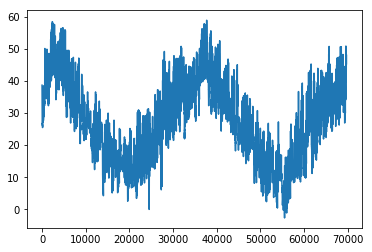

In [3]:
plt.plot(df['OT'])

## Correlation matrix before adding any extra features

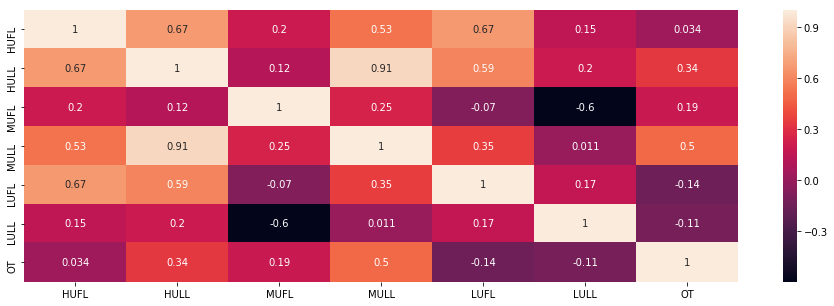

In [4]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)

## Using prophet to extract seasonality features

In [5]:
df = df.rename(columns = {'OT' : 'y', 'date' : 'ds'}) # renaming datetime and output column to fit into prophet

In [30]:
train = df.iloc[:56000]
test = df.iloc[56000:]
train

,ds,HUFL,HULL,MUFL,MULL,LUFL,LULL,y
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 00:15:00,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000
2,2016-07-01 00:30:00,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002
3,2016-07-01 00:45:00,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001
4,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
...,...,...,...,...,...,...,...,...
55995,2018-02-04 06:45:00,42.638000,0.000,43.800999,1.448,0.000,0.000,-0.888500
55996,2018-02-04 07:00:00,41.549000,0.000,43.747002,1.421,-1.279,0.000,-0.888500
55997,2018-02-04 07:15:00,40.375999,0.000,41.737000,0.000,0.000,0.000,-1.108500
55998,2018-02-04 07:30:00,38.449001,0.000,39.297001,0.000,0.000,0.000,-1.108500


In [31]:
mm = Prophet()
mm.fit(train)

11:07:55 - cmdstanpy - INFO - Chain [1] start processing
11:08:37 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
mfuture = mm.make_future_dataframe(periods=13680,freq='900s') # frequency as 15 minutes
mfuture

,ds
0,2016-07-01 00:00:00
1,2016-07-01 00:15:00
2,2016-07-01 00:30:00
3,2016-07-01 00:45:00
4,2016-07-01 01:00:00
...,...
69675,2018-06-26 18:45:00
69676,2018-06-26 19:00:00
69677,2018-06-26 19:15:00
69678,2018-06-26 19:30:00


In [33]:
mforecast = mm.predict(mfuture)
mforecast.tail(13680)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
56000,2018-02-04 08:00:00,5.741169,-2.381826,8.579222,5.741169,5.741169,-2.757246,-2.757246,-2.757246,-3.375565,-3.375565,-3.375565,0.618319,0.618319,0.618319,0.0,0.0,0.0,2.983923
56001,2018-02-04 08:15:00,5.739319,-2.363267,8.544413,5.739319,5.739319,-2.502670,-2.502670,-2.502670,-3.126693,-3.126693,-3.126693,0.624023,0.624023,0.624023,0.0,0.0,0.0,3.236648
56002,2018-02-04 08:30:00,5.737468,-2.054664,8.522624,5.737468,5.737468,-2.208929,-2.208929,-2.208929,-2.838533,-2.838533,-2.838533,0.629605,0.629605,0.629605,0.0,0.0,0.0,3.528540
56003,2018-02-04 08:45:00,5.735618,-1.689973,9.323361,5.735618,5.735618,-1.878646,-1.878646,-1.878646,-2.513709,-2.513709,-2.513709,0.635063,0.635063,0.635063,0.0,0.0,0.0,3.856973
56004,2018-02-04 09:00:00,5.733768,-1.007809,9.893228,5.733768,5.733768,-1.515274,-1.515274,-1.515274,-2.155672,-2.155672,-2.155672,0.640398,0.640398,0.640398,0.0,0.0,0.0,4.218494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69675,2018-06-26 18:45:00,-19.558052,-78.263968,37.968534,-78.226568,38.831137,1.503409,1.503409,1.503409,1.649255,1.649255,1.649255,-0.145846,-0.145846,-0.145846,0.0,0.0,0.0,-18.054643
69676,2018-06-26 19:00:00,-19.559902,-77.635490,39.987394,-78.235180,38.847432,1.232479,1.232479,1.232479,1.389304,1.389304,1.389304,-0.156825,-0.156825,-0.156825,0.0,0.0,0.0,-18.327423
69677,2018-06-26 19:15:00,-19.561752,-80.185319,37.988409,-78.243791,38.863727,0.975788,0.975788,0.975788,1.143630,1.143630,1.143630,-0.167842,-0.167842,-0.167842,0.0,0.0,0.0,-18.585964
69678,2018-06-26 19:30:00,-19.563602,-77.446043,38.658878,-78.252403,38.871274,0.734843,0.734843,0.734843,0.913738,0.913738,0.913738,-0.178895,-0.178895,-0.178895,0.0,0.0,0.0,-18.828759


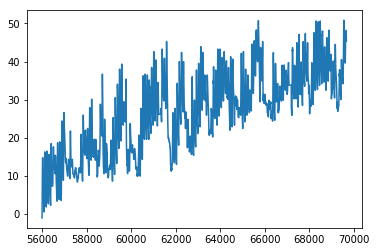

In [34]:
test['y'].plot() # y of test data

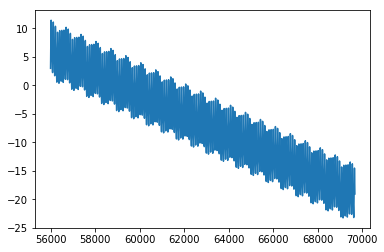

In [36]:
mforecast.tail(13680)['yhat'].plot() # prophet y predict plot for test data

### Extracting date features and adding prophet features

In [37]:
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df['weekday'] = df['ds'].dt.weekday
df['hour'] = df['ds'].dt.hour
df['trend'] = mforecast['trend']
df['additive_terms'] = mforecast['additive_terms']
df['daily'] = mforecast['daily'] 
df['weekly'] = mforecast['weekly']


### Adding rolling mean as a feature

In [40]:
df['rol_mean2'] = df['y'].rolling(2).mean()

## Correlation matrix after adding features

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)

## Xgboost

In [41]:
from xgboost import XGBRegressor

In [42]:
X = df.iloc[:56000,1:].drop('y',axis=1)
y = df.iloc[:56000,7]

In [43]:
X

,HUFL,HULL,MUFL,MULL,LUFL,LULL,day,month,year,weekday,hour,trend,additive_terms,daily,weekly,rol_mean2
0,41.130001,12.481,36.535999,9.355,4.424,1.311,1,7,2016,4,0,30.138253,-1.665898,-1.503648,-0.162250,NaN
1,39.622002,11.309,35.543999,8.551,3.209,1.258,1,7,2016,4,0,30.146140,-1.772954,-1.614073,-0.158881,38.442499
2,38.868000,10.555,34.365002,7.586,4.435,1.258,1,7,2016,4,0,30.154028,-1.878027,-1.722370,-0.155658,37.783501
3,35.518002,9.214,32.569000,8.712,4.435,1.215,1,7,2016,4,0,30.161916,-1.980473,-1.827893,-0.152580,37.234001
4,37.528000,10.136,33.936001,7.532,4.435,1.215,1,7,2016,4,1,30.169804,-2.079849,-1.930200,-0.149648,37.124001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,42.638000,0.000,43.800999,1.448,0.000,0.000,4,2,2018,6,6,5.750419,-3.417168,-4.005179,0.588012,-0.778750
55996,41.549000,0.000,43.747002,1.421,-1.279,0.000,4,2,2018,6,7,5.748569,-3.364481,-3.958788,0.594307,-0.888500
55997,40.375999,0.000,41.737000,0.000,0.000,0.000,4,2,2018,6,7,5.746719,-3.273822,-3.874309,0.600487,-0.998500
55998,38.449001,0.000,39.297001,0.000,0.000,0.000,4,2,2018,6,7,5.744869,-3.143056,-3.749606,0.606550,-1.108500


In [44]:
y

0        38.661999
1        38.223000
2        37.344002
3        37.124001
4        37.124001
           ...    
55995    -0.888500
55996    -0.888500
55997    -1.108500
55998    -1.108500
55999    -1.108500
Name: y, Length: 56000, dtype: float64

In [45]:
model = XGBRegressor()
model_fit = model.fit(X=X,y=y)

In [46]:
model_fit.predict(X=df.iloc[56000:,1:].drop('y',axis=1))

array([-1.0910285 , -0.8611013 , -0.23294555, ..., 45.750114  ,
       45.419624  , 45.394024  ], dtype=float32)

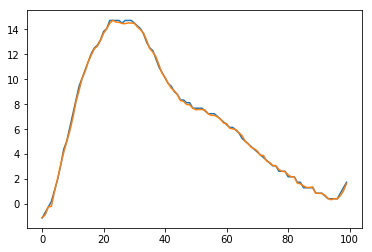

In [71]:
plt.plot(g[0:100])
plt.plot(model_fit.predict(X=df.iloc[56000:,1:].drop('y',axis=1))[0:100])

In [68]:
mape(g,model_fit.predict(X=df.iloc[56000:,1:].drop('y',axis=1)))

0.0071691021036893315

In [69]:
# Define the function to return the SMAPE value used to calculate the error.

def smape(actual, predicted) -> float:

  

    # Convert actual and predicted to numpy

    # array data type if not already

    if not all([isinstance(actual, np.ndarray),

                isinstance(predicted, np.ndarray)]):

        actual = np.array(actual)

        predicted = np.array(predicted)



    error = round(

        np.mean(

            np.abs(predicted - actual) /

            ((np.abs(predicted) + np.abs(actual))/2)

        )*100, 2)

  

    return error

In [70]:
smape(g,model_fit.predict(X=df.iloc[56000:,1:].drop('y',axis=1)))

0.72

## Light GBM

In [74]:
from lightgbm import LGBMRegressor

C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [77]:
model_lgm = LGBMRegressor()

In [78]:
lgm_fit = model_lgm.fit(X= X,y=y)

In [80]:
lgm_fit.predict(X=df.iloc[56000:,1:].drop('y',axis=1))

array([-0.86329506, -0.86329506, -0.79524513, ..., 45.67967162,
       45.46560517, 45.4606874 ])

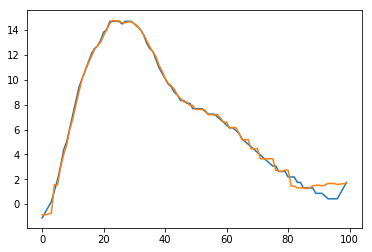

In [84]:
plt.plot(g[0:100])
plt.plot(lgm_fit.predict(X=df.iloc[56000:,1:].drop('y',axis=1))[0:100])

In [83]:
mape(g,lgm_fit.predict(X=df.iloc[56000:,1:].drop('y',axis=1)))

0.008471483887705671

In [85]:
smape(g,lgm_fit.predict(X=df.iloc[56000:,1:].drop('y',axis=1)))

0.77

In [93]:
!pip install hyperopt

     ---------------------------------------- 1.6/1.6 MB 87.4 kB/s eta 0:00:00
  Using cached future-0.18.2.tar.gz (829 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 200.5/200.5 kB 553.0 kB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 981.6 kB/s eta 0:00:00
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491086 sha256=16c6f0ae2a919cc91b996c6bb97297aa20e736f192ac7bf8a5a9f4e7c23e20c5
  Stored in directory: c:\users\dreddy86\appdata\local\pip\cache\wheels\3e\3c\b4\7132d27620dd551cf00823f798a7190e7320ae7ffb71d1e989
Successfully built future
  Attempting uninstall: networkx
    Found existing installation: networkx 2.1
    Uninstalling networkx-2.1:
      Successfully uninstalled networkx-2.1
